##### `Load Data`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("kitchen_pooling_model.csv")
df.sample(3)

,Model,People,Breakfast (₹),Lunch (₹),Dinner (₹),Snacks (₹),Tea/Coffee/Milk (₹),Staff (₹),Packing (₹),Fuel (₹),Delivery (₹),Overhead (₹),Total (₹),Avg_Per_Person_1_day (₹),VAT_5pct (₹),Grand_Total (₹)
4,Ultra_Light,100,1200,2000,2000,500,500,318,100,505,80,80,7283,72.83,364.15,7647.15
162,Premium,975,87750,214500,195000,48750,24375,24615,13890,19596,7385,7385,643246,659.74,32162.30,675408.30
54,Light,325,9750,21125,19500,4875,3250,2044,1365,1823,818,818,65368,201.13,3268.40,68636.40


In [2]:
# Remove ₹ and other symbols from column headers
df.columns = [col.replace(" (₹)", "") for col in df.columns]

##### `Basic Data Checks`

In [3]:
# Shape and structure
print(f"Shape: {df.shape}")
df.info()

# Summary statistics
df.describe()

Shape: (205, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 205 non-null    object 
 1   People                205 non-null    int64  
 2   Breakfast             205 non-null    int64  
 3   Lunch                 205 non-null    int64  
 4   Dinner                205 non-null    int64  
 5   Snacks                205 non-null    int64  
 6   Tea/Coffee/Milk       205 non-null    int64  
 7   Staff                 205 non-null    int64  
 8   Packing               205 non-null    int64  
 9   Fuel                  205 non-null    int64  
 10  Delivery              205 non-null    int64  
 11  Overhead              205 non-null    int64  
 12  Total                 205 non-null    int64  
 13  Avg_Per_Person_1_day  205 non-null    float64
 14  VAT_5pct              205 non-null    float64
 15  Grand_

,People,Breakfast,Lunch,Dinner,Snacks,Tea/Coffee/Milk,Staff,Packing,Fuel,Delivery,Overhead,Total,Avg_Per_Person_1_day,VAT_5pct,Grand_Total
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,2.050000e+02
mean,500.024390,34201.668293,84504.121951,78503.829268,18000.878049,9500.463415,9967.014634,6011.156098,8061.985366,3340.907317,3062.492683,2.551545e+05,518.153512,12757.725854,2.679122e+05
std,296.486822,34858.909731,92753.484466,86467.093679,20915.962346,9163.148174,11094.607483,6797.556213,8211.084670,3632.685254,3095.556636,2.764858e+05,409.553760,13824.290424,2.903101e+05
min,1.000000,12.000000,20.000000,20.000000,5.000000,5.000000,8.000000,2.000000,8.000000,2.000000,2.000000,8.400000e+01,69.730000,4.200000,8.820000e+01
25%,250.000000,8100.000000,15500.000000,15000.000000,3500.000000,2875.000000,1723.000000,695.000000,2272.000000,482.000000,482.000000,5.245400e+04,198.440000,2622.700000,5.507670e+04
50%,500.000000,22500.000000,50000.000000,46500.000000,10000.000000,6375.000000,4923.000000,3244.000000,4444.000000,1898.000000,1888.000000,1.537160e+05,414.240000,7685.800000,1.614018e+05
75%,750.000000,51000.000000,122500.000000,113750.000000,23750.000000,13125.000000,14427.000000,8538.000000,11681.000000,4822.000000,4671.000000,3.669050e+05,678.530000,18345.250000,3.852502e+05
max,1000.000000,150000.000000,400000.000000,375000.000000,90000.000000,40000.000000,45214.000000,28385.000000,35083.000000,15071.000000,12559.000000,1.191312e+06,1495.000000,59565.600000,1.250878e+06


##### `Unique Model and People Counts`

In [4]:
# Unique model types
df["Model"].unique()

# Distribution of people per model
df.groupby("Model")["People"].count()

Model
Basic            41
Light            41
Premium          41
Ultra_Light      41
Ultra_Premium    41
Name: People, dtype: int64

##### `Cost Trends by Group`
* Total Cost vs People Count (by Model)

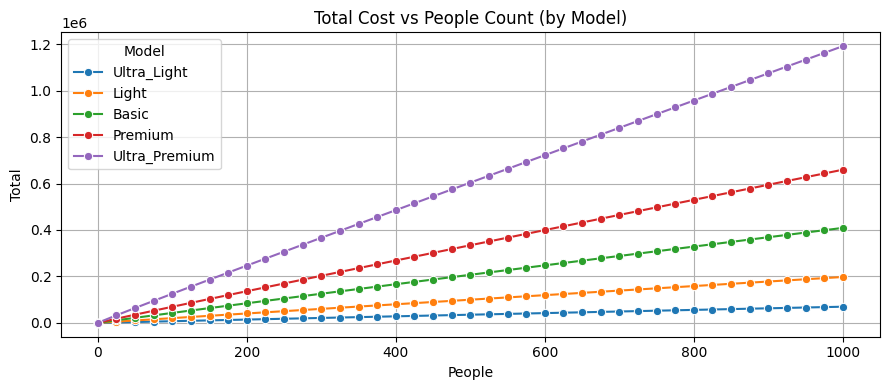

In [5]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=df, x="People", y="Total", hue="Model", marker="o")
plt.title("Total Cost vs People Count (by Model)")
plt.grid(True)
plt.tight_layout()
plt.show()

* Average per person

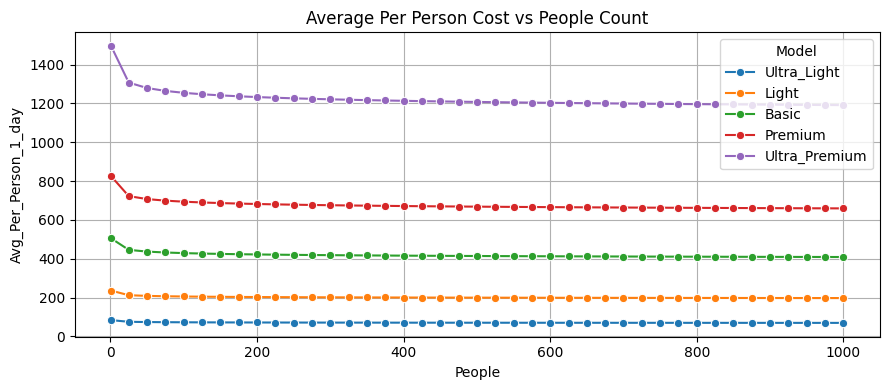

In [6]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=df, x="People", y="Avg_Per_Person_1_day", hue="Model", marker="o")
plt.title("Average Per Person Cost vs People Count")
plt.grid(True)
plt.tight_layout()
plt.show()

##### `Category-wise Breakdown (Boxplot or Barplot)`

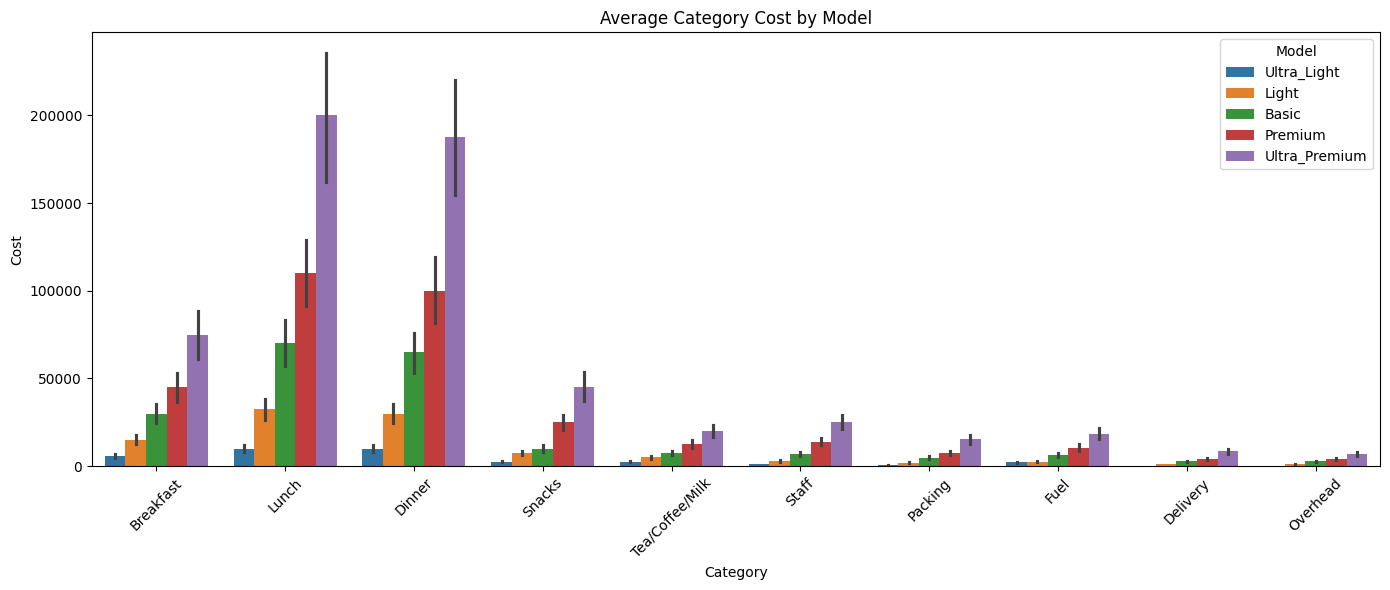

In [7]:
# Melt data for plotting
category_cols = [
    "Breakfast",
    "Lunch",
    "Dinner",
    "Snacks",
    "Tea/Coffee/Milk",
    "Staff",
    "Packing",
    "Fuel",
    "Delivery",
    "Overhead",
]
df_melted = df.melt(
    id_vars=["Model", "People"],
    value_vars=category_cols,
    var_name="Category",
    value_name="Cost",
)

# Average category cost per model
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x="Category", y="Cost", hue="Model", estimator="mean")
plt.title("Average Category Cost by Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### `Cost Composition per Person`

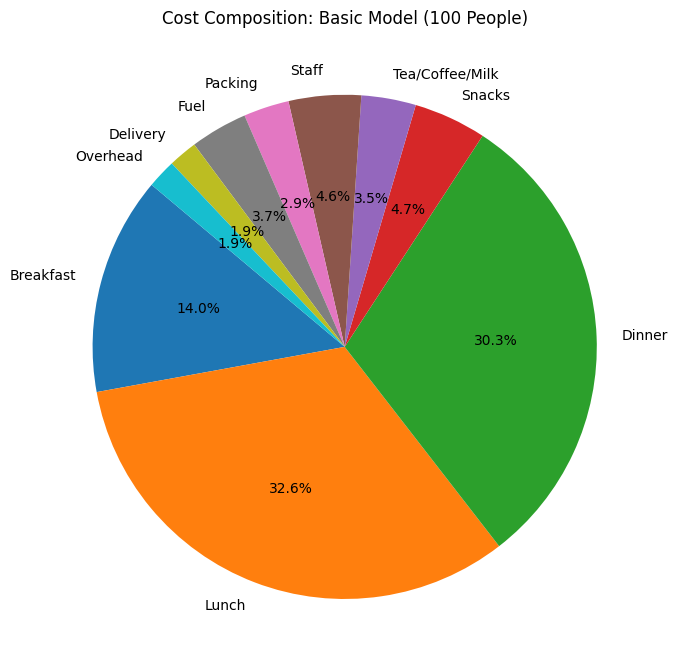

In [8]:
sample = df[(df["Model"] == "Basic") & (df["People"] == 100)].iloc[0]
category_values = sample[category_cols]

plt.figure(figsize=(7, 8))
plt.pie(category_values, labels=category_cols, autopct="%1.1f%%", startangle=140)
plt.title("Cost Composition: Basic Model (100 People)")
plt.tight_layout()
plt.show()

##### `Correlation Matrix`

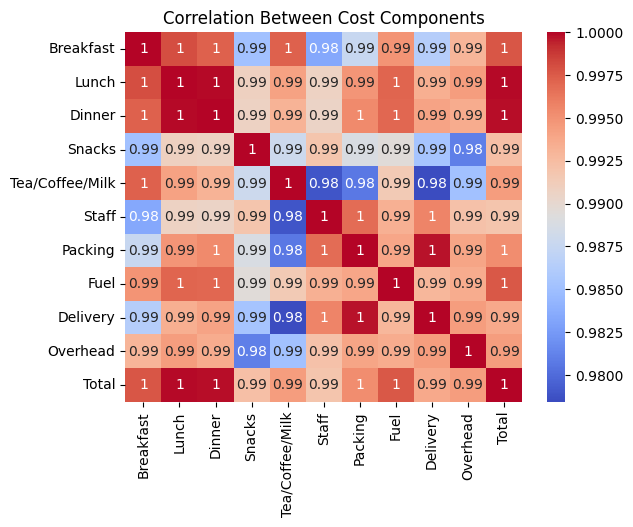

In [9]:
corr = df[category_cols + ["Total"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Cost Components")
plt.show()

In [10]:
# Average cost per model
mean_per_model = df.groupby("Model")[category_cols + ["Total"]].mean().round(2)
mean_per_model

,Breakfast,Lunch,Dinner,Snacks,Tea/Coffee/Milk,Staff,Packing,Fuel,Delivery,Overhead,Total
Model,,,,,,,,,,,
Basic,30001.46,70003.41,65003.17,10000.49,7500.37,6960.20,4785.95,6586.63,2784.02,2784.02,206409.73
Light,15000.73,32501.59,30001.46,7500.37,5000.24,2784.02,1914.29,2634.59,1113.68,1113.68,99564.66
Premium,45002.20,110005.37,100004.88,25001.22,12500.61,13920.37,7657.59,10538.46,4176.17,4176.17,332983.02
Ultra_Light,6000.29,10000.49,10000.49,2500.12,2500.12,1113.68,382.88,2107.78,278.39,278.39,35162.63
Ultra_Premium,75003.66,200009.76,187509.15,45002.20,20000.98,25056.80,15315.07,18442.46,8352.27,6960.20,601652.54


##### `Kitchen Pooling Model - Key Value Insights`

| #     | Insight                                                    | Description                                                                                                                                                                                                                                                                                                                                    |
| ----- | ---------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1** | **Budget Flexibility for Apartments**                      | The model supports a wide range of cost tiers — from *Ultra Light* to *Ultra Premium*. Each apartment or housing society can select a plan based on its residents’ budget, dietary needs, and lifestyle.                                                                                                                                       |
| **2** | **Supports Busy Families, Especially Women**               | In today's fast-paced lifestyle, families — particularly homemakers — bear the brunt of daily cooking. Kitchen pooling offers a **budget-friendly** and **stress-reducing** alternative, especially during weekdays.                                                                                                                           |
| **3** | **A New Category in Food Chain: “Home Stay” for Kitchens** | Similar to homestays for accommodation, this concept acts as a **“Home Kitchen Service”**, where meals are prepared in pooled kitchens and distributed efficiently. This bridges the gap between **home-cooked food quality** and **centralized affordability**.                                                                               |
| **4** | **Scope for Economies of Scale**                           | The current model is conservative. Over time, significant cost reductions are possible via:<ul><li>Bulk procurement of staples (rice, oil, vegetables, etc.)</li><li>Vendor negotiations for daily delivery discounts</li><li>Centralized kitchen staff shared across apartments</li></ul> Future optimization can lead to **15–25% savings**. |
